In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import scipy
from sklearn.preprocessing import StandardScaler , LabelEncoder , RobustScaler , StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score , davies_bouldin_score
from sklearn.manifold import TSNE

In [2]:
pd.set_option('display.max_columns',99)

In [5]:
data = pd.read_csv(r"C:\Users\UAE\Downloads\Abdur Rafay\Datasets\customer_segmentation.csv")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [6]:
# CHECK UNIQUE COLUMNS
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
# CHECK TYPE DATA EACH COLUMNS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
# CHECK TOTAL OF UNIQUE CLASS IN EACH FEATURE/COLUMNS
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [9]:
# CHECK HOW MUCH NULL COLUMNS
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
# CHECK DUPLICATED SAMPLE
data.duplicated().sum()

0

In [11]:
# CHECK DESCRIPTIVE STATISTICS
data.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [12]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [13]:
# DELETE MISSING VALUES

data_clean = data.dropna(axis=0, how='any')
data_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [14]:
# CHECK BACK MISSING VALUES
data_clean.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [15]:
# SEPARATING NUMERIC AND OBJECT DATA

object_data = data_clean.select_dtypes('object')
numeric_data = data_clean.select_dtypes(('int64','float64'))
numeric_data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)  # DROP USELESS FEATURE

object_data.shape , numeric_data.shape , type(object_data) , type(numeric_data)

((2216, 3),
 (2216, 24),
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

C:\Users\UAE\AppData\Local\Temp\ipykernel_21572\1222491679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.countplot(data= object_data, x = 'Education', palette='Set2')


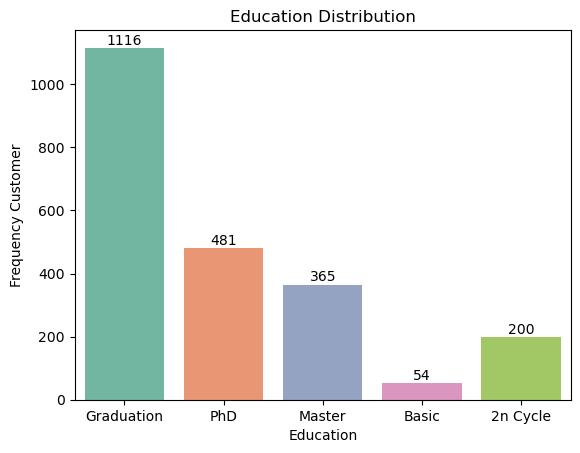

In [16]:
# DISPLAY EDUCATION BAR CHART
axes = sns.countplot(data= object_data, x = 'Education', palette='Set2')

# TO DISPLAY VALUE IN EACH BAR
for ax in axes.patches:
    height = ax.get_height()  # GET HEIGHT AXIS
    axes.text(x = ax.get_x() + ax.get_width() / 2. , y = height + 1, s = int(height), ha='center', va='bottom', fontsize=10)

plt.title('Education Distribution')
plt.ylabel('Frequency Customer')
plt.show()

C:\Users\UAE\AppData\Local\Temp\ipykernel_21572\1330698764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.countplot(data= object_data, x= 'Marital_Status', palette='Set2')


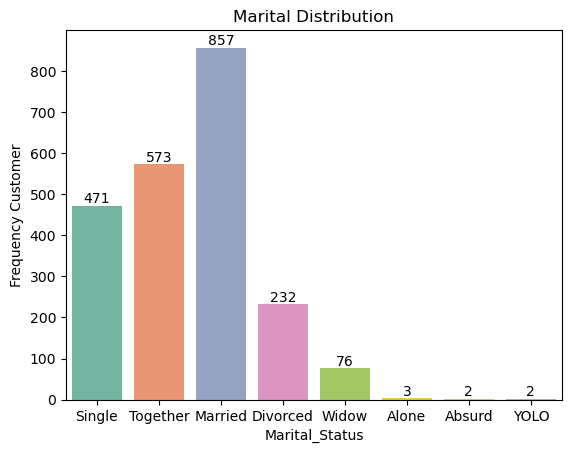

In [17]:
# DISPLAY MARITAL STATUS

axes = sns.countplot(data= object_data, x= 'Marital_Status', palette='Set2')

for ax in axes.patches:
    height = ax.get_height()

    axes.text(x = ax.get_x() + ax.get_width() / 2, y = height , s= int(height), ha='center', va='bottom', fontsize=10)

plt.title('Marital Distribution')
plt.ylabel('Frequency Customer')
plt.show()

Text(0.5, 1.0, 'Distribution of marital status based on education')

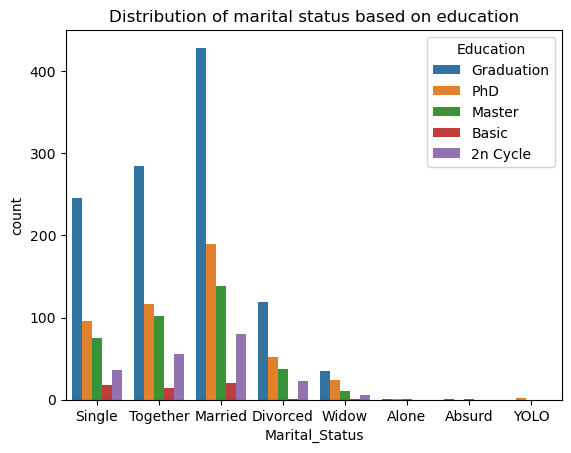

In [18]:
sns.countplot(data= object_data, x='Marital_Status', hue='Education')
plt.title('Distribution of marital status based on education')

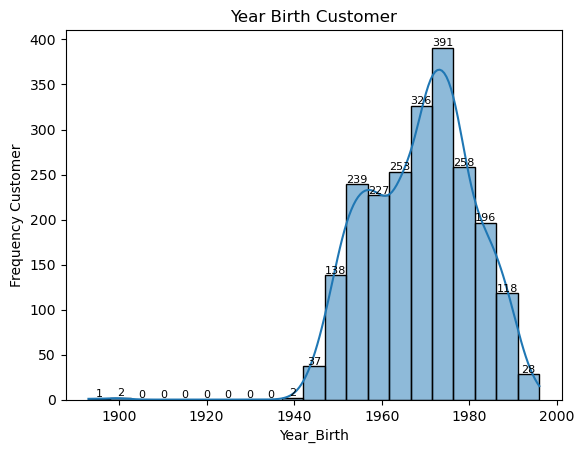

In [19]:
# DISPLAY Year Birth Customer

axes = sns.histplot(data= numeric_data, x='Year_Birth', kde=True, binwidth=5)

# DISPLAY VALUE IN EACH BAR
for ax in axes.patches:
    height = ax.get_height()

    axes.text(x = ax.get_x() + ax.get_width() / 2, y = height , s= int(height), ha='center', va='bottom', fontsize=8)

plt.title('Year Birth Customer')
plt.ylabel('Frequency Customer')
plt.show()

Text(0.5, 1.0, 'Distribution of Birth Year Based on Marital Status')

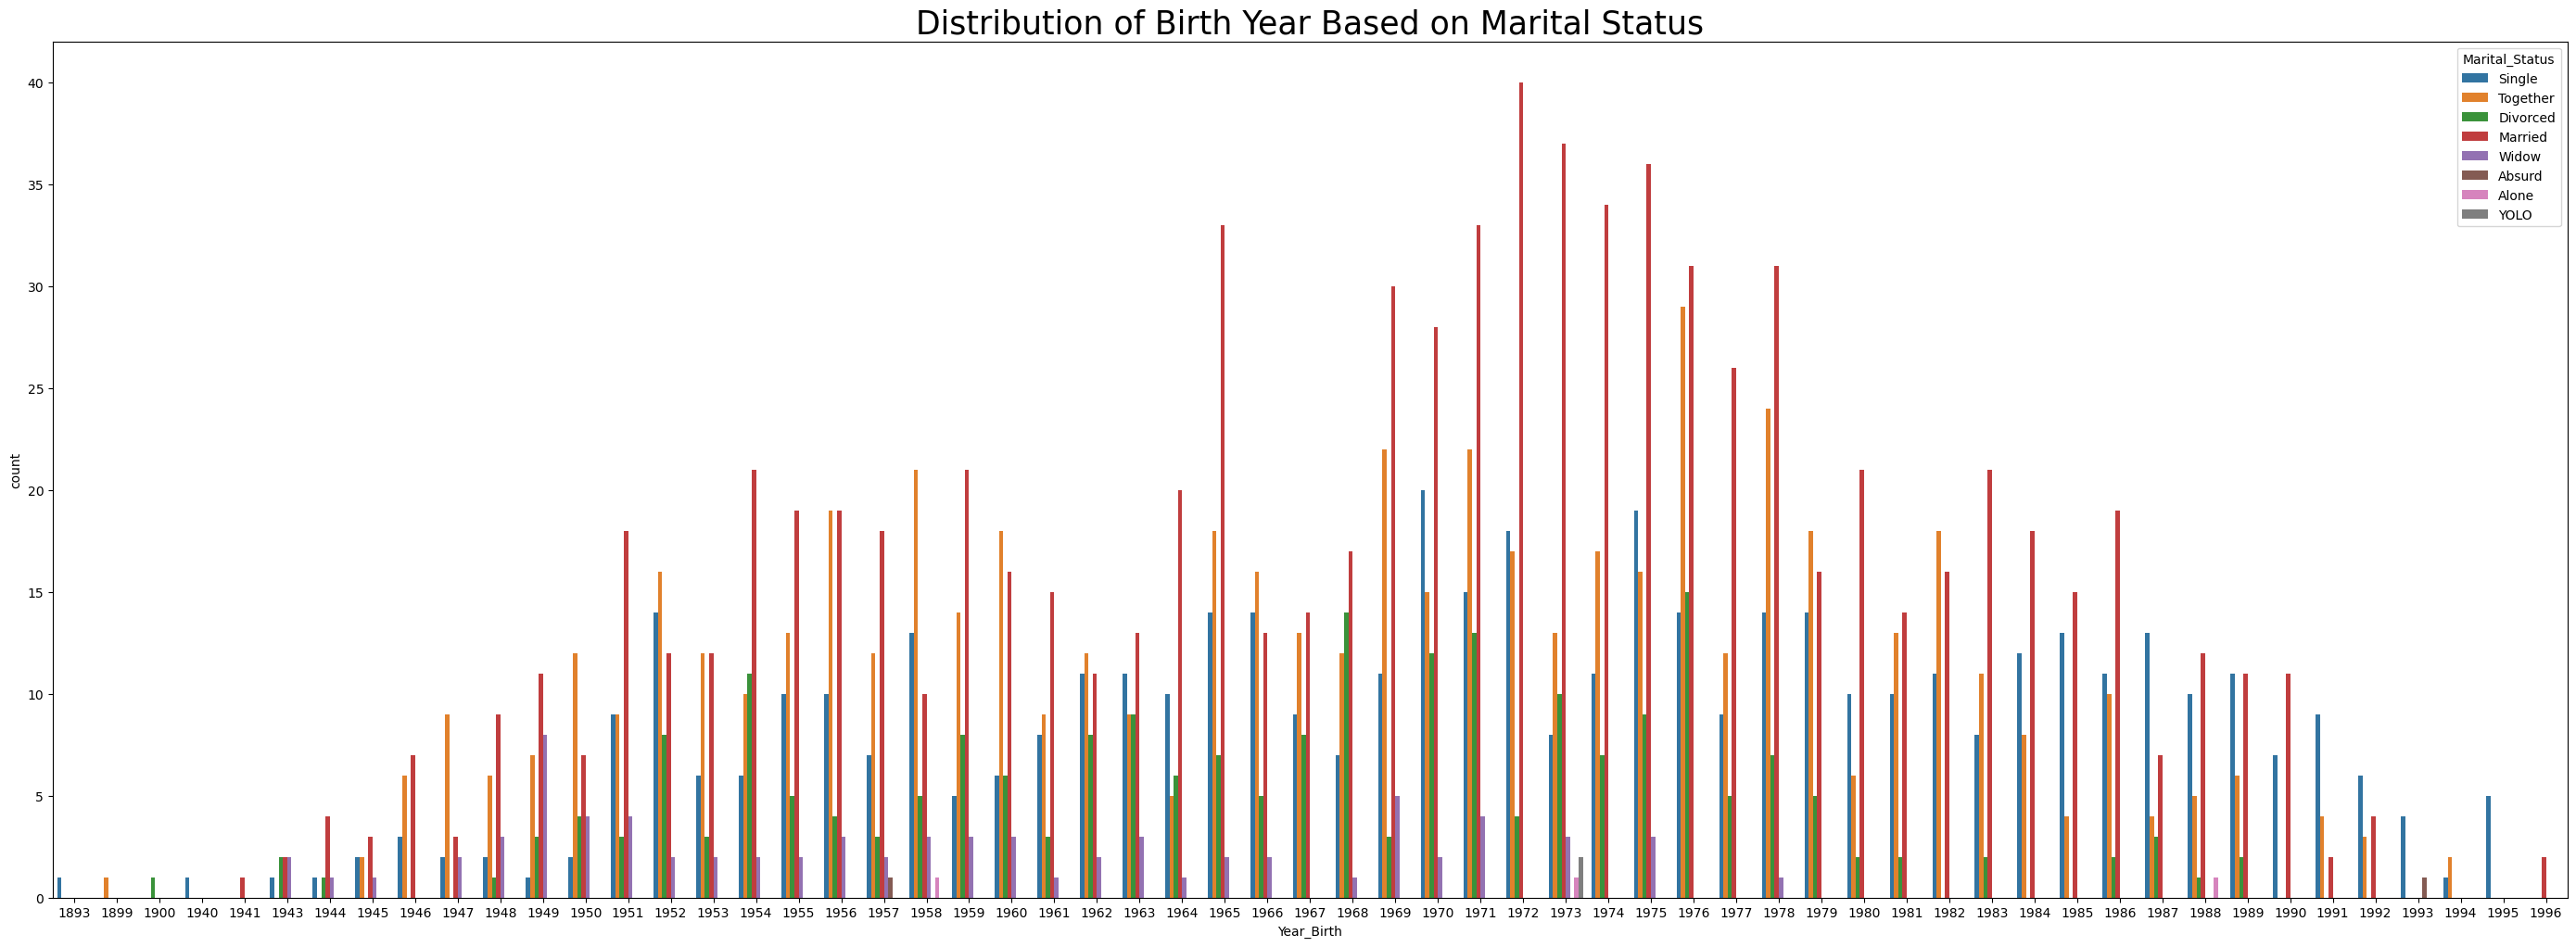

In [20]:
plt.figure(figsize=(35,12))
sns.countplot(data= data, x='Year_Birth', hue='Marital_Status')
plt.title('Distribution of Birth Year Based on Marital Status',fontsize=25)

C:\Users\UAE\AppData\Local\Temp\ipykernel_21572\1518083359.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.countplot(data= numeric_data, x='Kidhome', palette= 'pastel', ax= Axes[0])
C:\Users\UAE\AppData\Local\Temp\ipykernel_21572\1518083359.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.countplot(data=numeric_data, x='Teenhome', palette='pastel', ax= Axes[1])


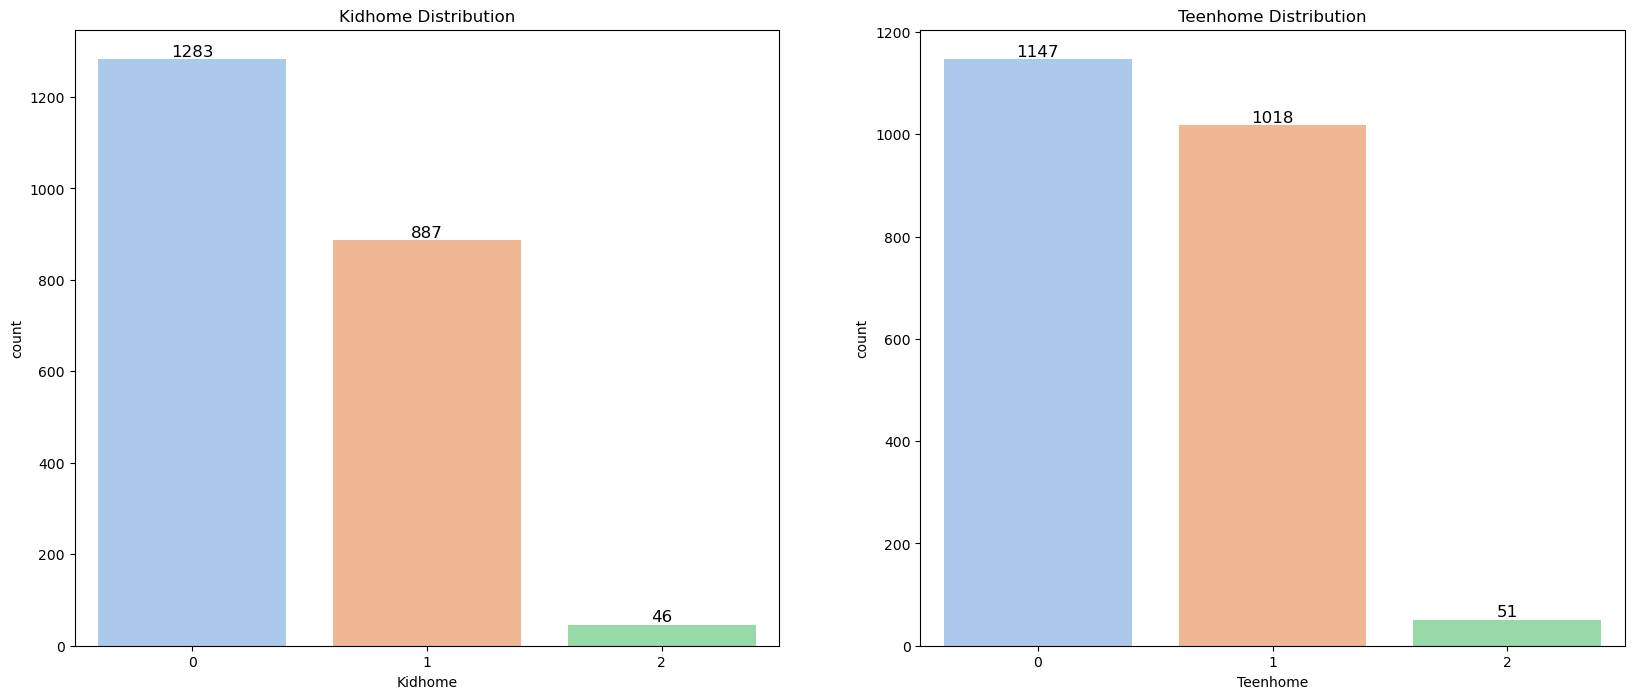

In [21]:
# DISPLAY KIDHOME AND TEENHOME

fig , Axes = plt.subplots(nrows=1 , ncols=2, figsize=(20,8))

# DISPLAY KIDHOME INFO
axes = sns.countplot(data= numeric_data, x='Kidhome', palette= 'pastel', ax= Axes[0])
Axes[0].set_title('Kidhome Distribution')
for ax in axes.patches:
    height = ax.get_height()
    axes.text(x= ax.get_x() + ax.get_width() / 2. , y = height , s=int(height), ha='center', va='bottom',fontsize=12)



# DISPLAY TEENHOME INFO
axes = sns.countplot(data=numeric_data, x='Teenhome', palette='pastel', ax= Axes[1])
Axes[1].set_title('Teenhome Distribution')
for ax in axes.patches:
    height = ax.get_height()
    axes.text(x= ax.get_x() + ax.get_width() / 2, y = height, s= int(height), ha='center', va='bottom', fontsize=12)

plt.show()

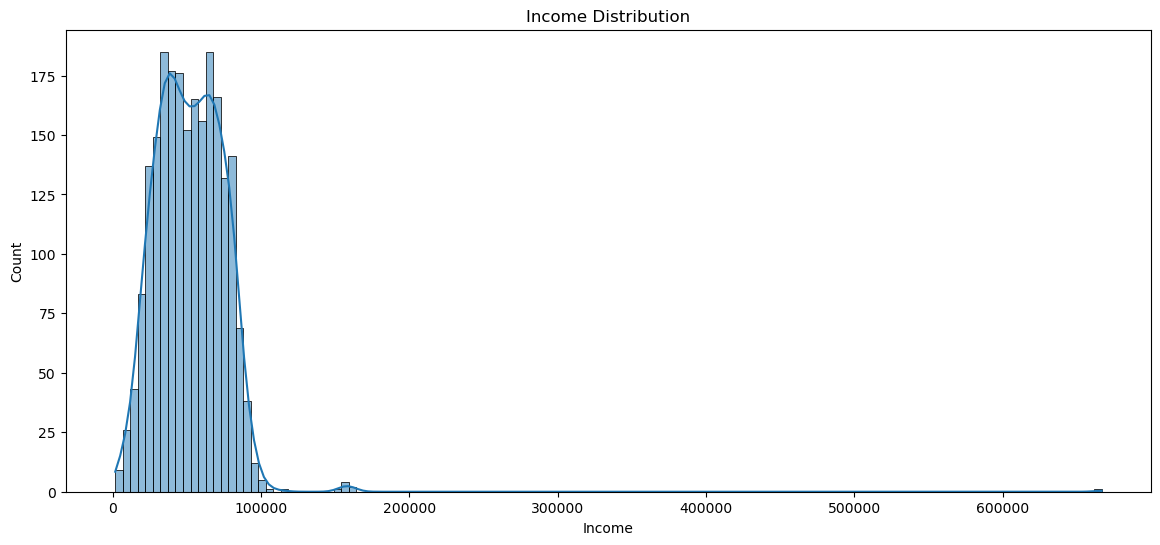

In [22]:
# DISPLAY INCOME CHART

plt.figure(figsize=(14,6))
sns.histplot(data= numeric_data, x='Income', kde=True)

plt.title('Income Distribution')
plt.show()

C:\Users\UAE\AppData\Local\Temp\ipykernel_21572\666398486.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data= numeric_data, y='Income', palette='deep')
C:\Users\UAE\AppData\Local\Temp\ipykernel_21572\666398486.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data= numeric_data, y='Income', palette='bright')


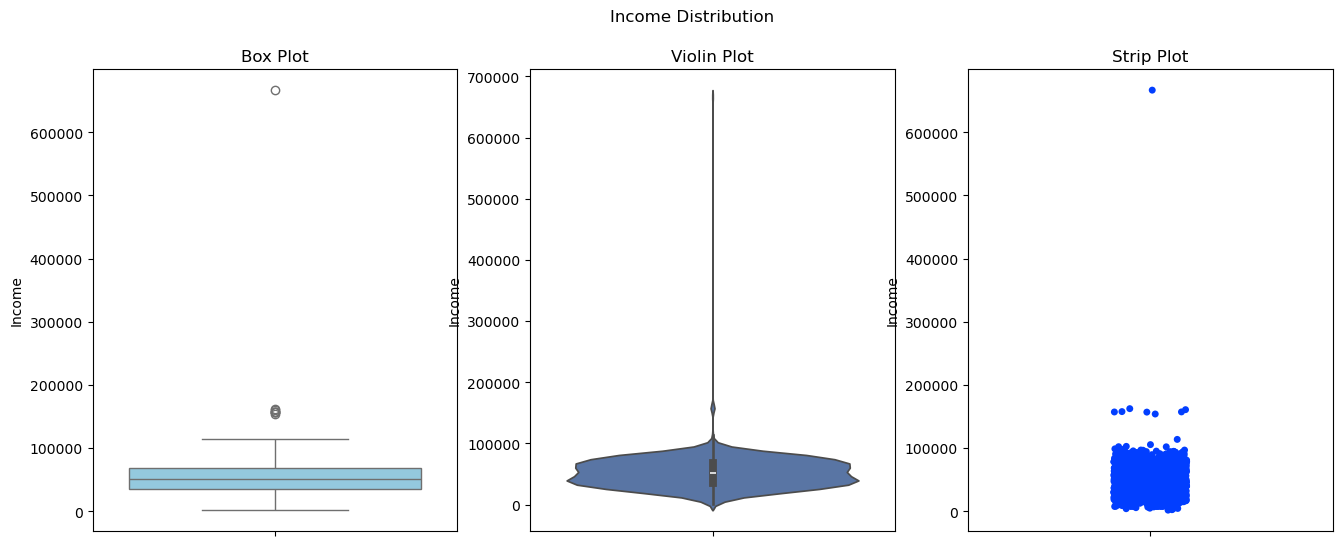

In [23]:
# DISPLAY INCOME DISTRIBUTION USING BOXPLOT AND VIOLINPLOT

plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.boxplot(data= numeric_data, y='Income', color='skyblue')
plt.title('Box Plot')

plt.subplot(1,3,2)
sns.violinplot(data= numeric_data, y='Income', palette='deep')
plt.title('Violin Plot')

plt.subplot(1,3,3)
sns.stripplot(data= numeric_data, y='Income', palette='bright')
plt.title('Strip Plot')

plt.suptitle('Income Distribution')
plt.show()

In [24]:
# DELETE OUTLIER

data_clean = data_clean[data_clean['Income'] < 120000]
data_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


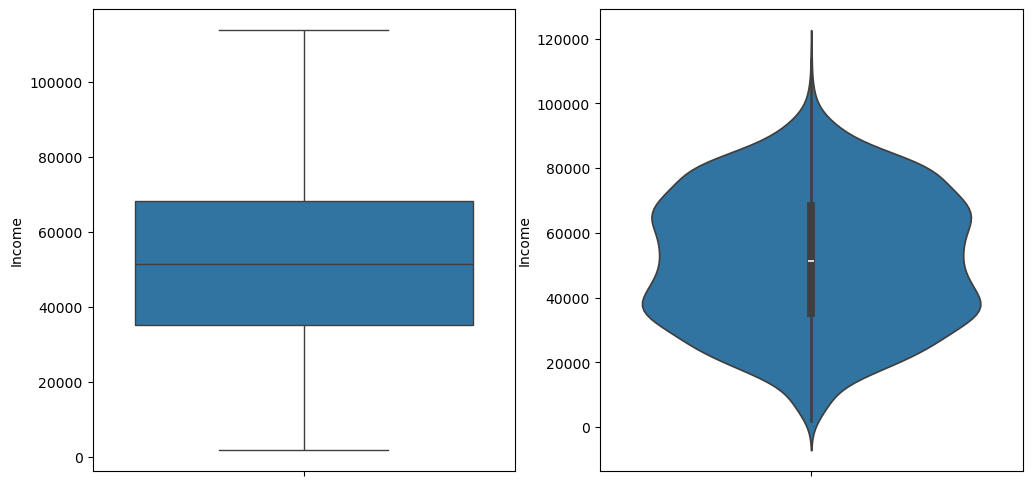

In [25]:
# CHECK IT BACK

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(data= data_clean, y='Income')

plt.subplot(1,2,2)
sns.violinplot(data= data_clean, y='Income')

plt.show()

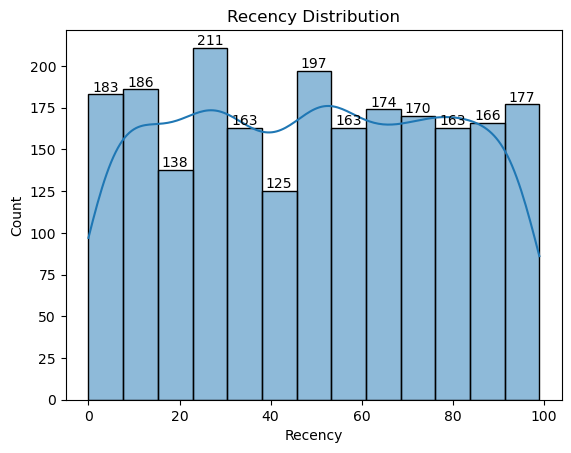

In [26]:
# DISPLAY RECENCY COLUMNS INFO

axes = sns.histplot(data= numeric_data, x='Recency', kde=True)

# DISPLAY VALUE IN EACH BAR
for ax in axes.patches:
    axes.text(x= ax.get_x() + ax.get_width() / 2 , y = ax.get_height() , s= ax.get_height(), ha='center', va='bottom', fontsize=10)

plt.title('Recency Distribution')
plt.show()

C:\Users\UAE\AppData\Local\Temp\ipykernel_21572\4000968568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_clean, y='Recency', palette='pastel')
C:\Users\UAE\AppData\Local\Temp\ipykernel_21572\4000968568.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_clean, y='Recency', palette='deep')


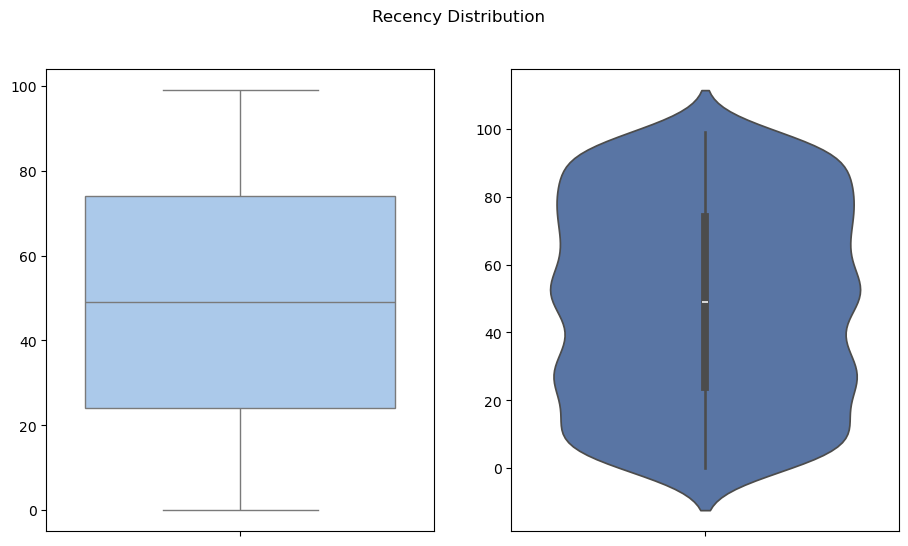

In [27]:
# RECENCY BOXPLOT AND VIOLIN PLOT

plt.figure(figsize=(11,6))

plt.subplot(1,2,1)
sns.boxplot(data=data_clean, y='Recency', palette='pastel')
plt.ylabel('')

plt.subplot(1,2,2)
sns.violinplot(data=data_clean, y='Recency', palette='deep')
plt.ylabel('')

plt.suptitle('Recency Distribution')
plt.show()

In [28]:
fig1 = px.histogram(data_frame=data, x='Recency', color='Marital_Status', title='Recency Distribution based on Marital Status')
fig2 = px.histogram(data_frame=data, x='Recency', color='Education', title='Recency Distribution based on Education')


fig1.show()
fig2.show()

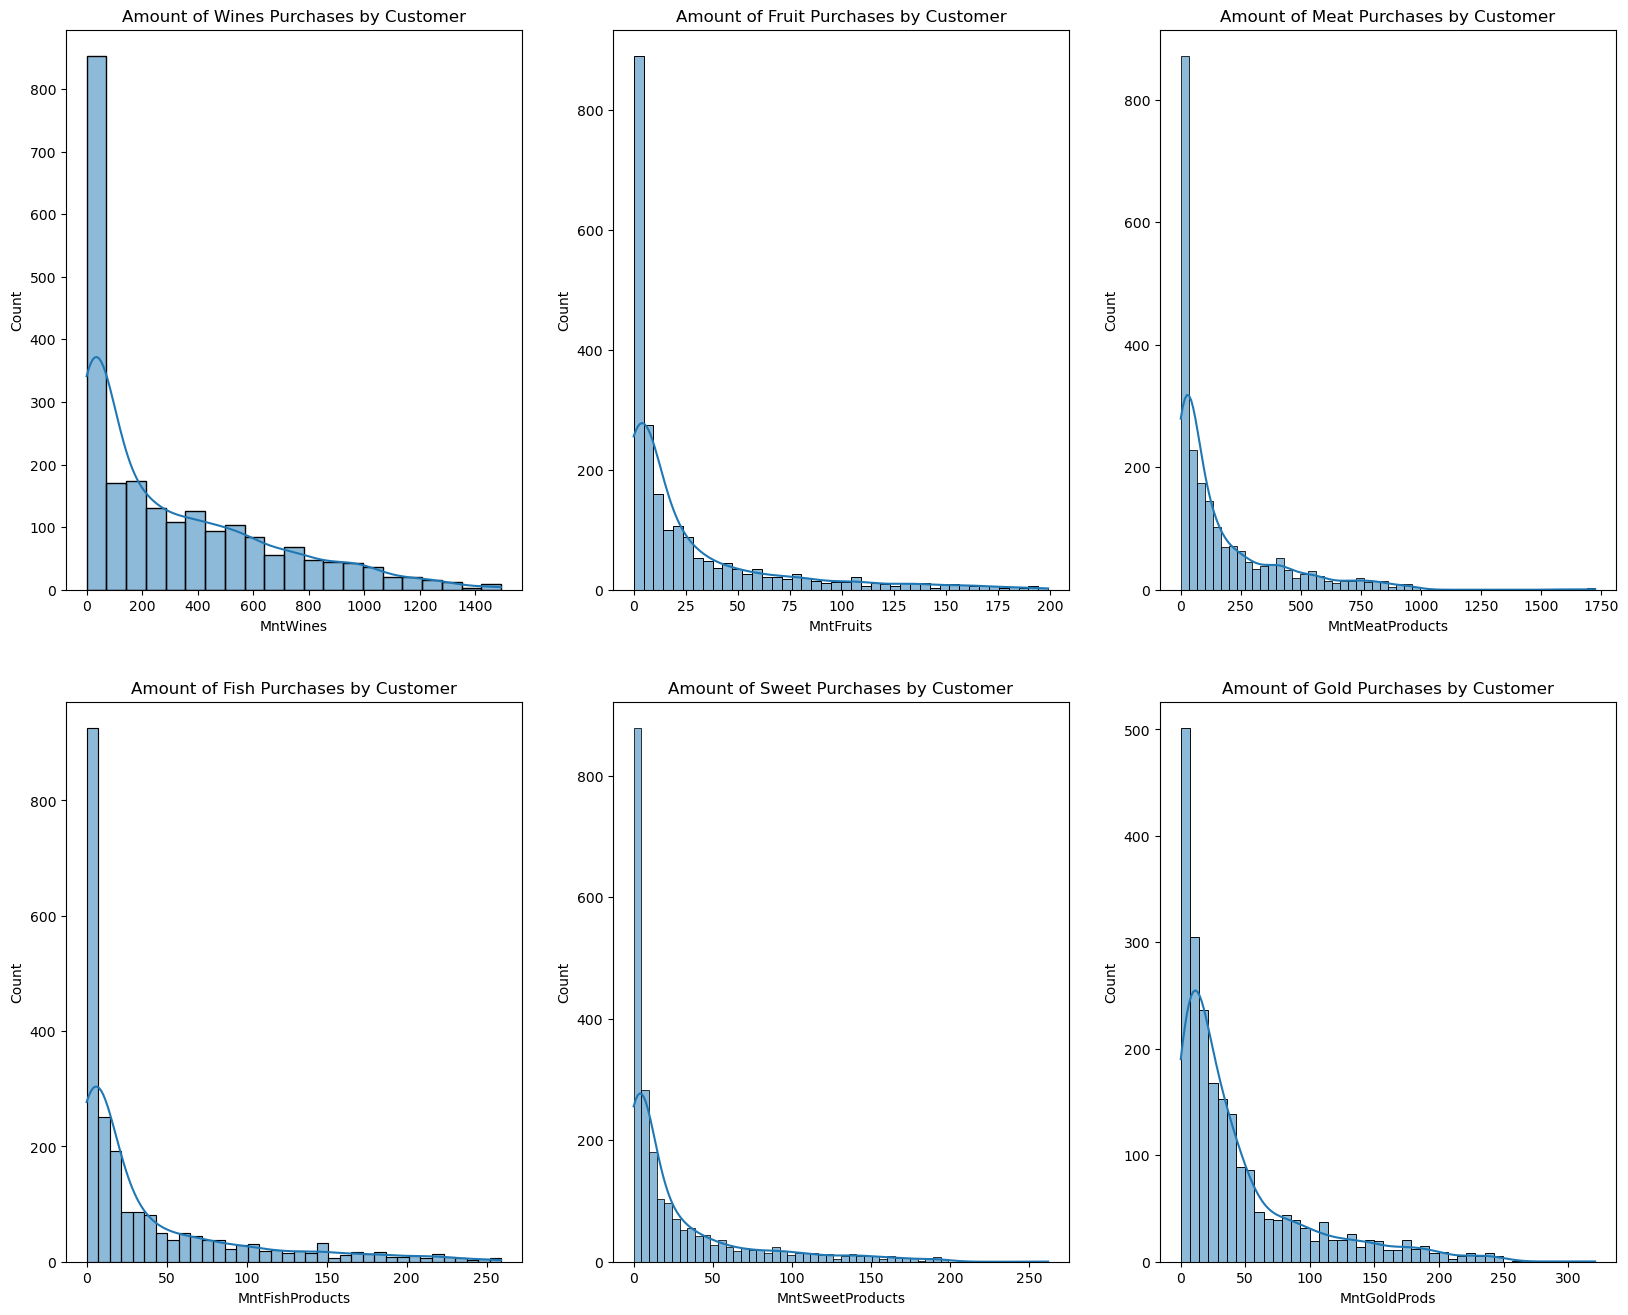

In [29]:
# DISPLAY 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds' Columns

fig , axes = plt.subplots(nrows=2, ncols=3, figsize=(20,16))

sns.histplot(data= numeric_data, x='MntWines', kde=True, ax= axes[0,0])
axes[0,0].set_title('Amount of Wines Purchases by Customer')

sns.histplot(data= numeric_data, x='MntFruits', kde=True, ax= axes[0,1])
axes[0,1].set_title('Amount of Fruit Purchases by Customer')

sns.histplot(data= numeric_data, x='MntMeatProducts', kde=True, ax= axes[0,2])
axes[0,2].set_title('Amount of Meat Purchases by Customer')

sns.histplot(data= numeric_data, x='MntFishProducts', kde=True, ax=axes[1,0])
axes[1,0].set_title('Amount of Fish Purchases by Customer')

sns.histplot(data= numeric_data, x='MntSweetProducts', kde=True, ax=axes[1,1])
axes[1,1].set_title('Amount of Sweet Purchases by Customer')

sns.histplot(data= numeric_data, x='MntGoldProds', kde=True, ax=axes[1,2])
axes[1,2].set_title('Amount of Gold Purchases by Customer')


plt.show()

In [30]:
# Distribution of Wines Purchases based on Education , Marital_Status , Kidhome , Teenhome

fig1 = px.histogram(data_frame= data, x='MntWines', color='Education', title='Distribution of Wine Purchases by Education')
fig2 = px.histogram(data_frame= data, x='MntWines', color='Marital_Status', title='Distribution of Wines Purchases by Marital Status')
fig3 = px.histogram(data_frame= data, x='MntWines', color='Kidhome', title='Distribution of Wines Purchases by Kidhome')
fig4 = px.histogram(data_frame= data, x='MntWines', color='Teenhome', title='Distribution of Wines Purchases by Teenhome')

fig1.show()
fig2.show()
fig3.show()
fig4.show()


# CHECK USING T-TEST 

# Is there a significant difference in purchasing wines between customers who have Kid and those who do not?
customer_no_kid = data[data['Kidhome'] == 0]['MntWines']
customer_with_kid = data[data['Kidhome'] >= 1]['MntWines']

t_stat , p_value = scipy.stats.ttest_ind(a = customer_no_kid, b= customer_with_kid)

print('Result T-Test:\n')
if p_value < 0.05: 
    print("There is a significant difference in Purchasing Wines between Customers who have Kid and those who dont")
else: 
    print("There is no significant difference in Purchasing Wines between Customers who have Kid and those who dont")
print('\n\n')

# Is there a significant difference in purchasing wines between customers who have Kid and those who do not?
customer_no_teen = data[data['Teenhome'] == 0]['MntWines']
customer_with_teen = data[data['Teenhome'] >= 1]['MntWines']

print('Result T-Test:\n')
if p_value < 0.05: 
    print("There is a significant difference in Purchasing Wines between Customers who have Teen and those who dont")
else: 
    print("There is no significant difference in Purchasing Wines between Customers who have Teen and those who dont")


Result T-Test:

There is a significant difference in Purchasing Wines between Customers who have Kid and those who dont



Result T-Test:

There is a significant difference in Purchasing Wines between Customers who have Teen and those who dont


In [31]:
# Distribution of Fruits Purchases

fig1 = px.histogram(data_frame=data, x='MntFruits', color='Kidhome', title='Distribution of Fruits Purchases based Kidhome')
fig2 = px.histogram(data_frame=data, x='MntFruits', color='Teenhome', title='Distribution of Fruits Purchases based Teenhome')

fig1.show()
fig2.show()

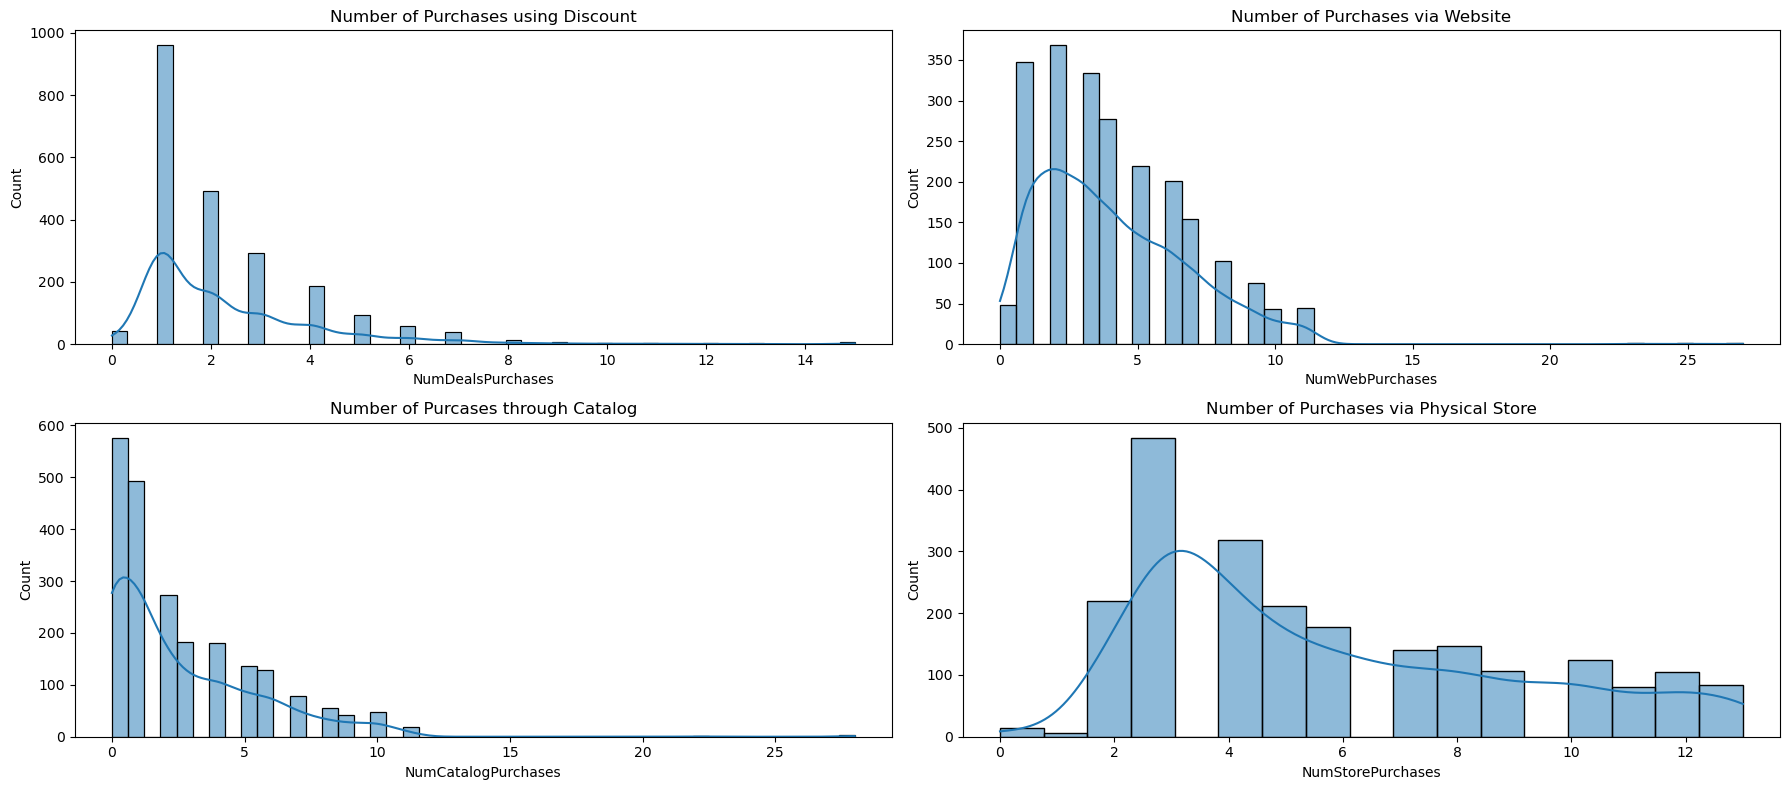

In [32]:
# DISPLAY 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'

plt.figure(figsize=(18,8))

plt.subplot(2,2,1)
sns.histplot(data= numeric_data, x='NumDealsPurchases', kde=True)
plt.title('Number of Purchases using Discount')

plt.subplot(2,2,2)
sns.histplot(data= numeric_data, x='NumWebPurchases', kde=True)
plt.title('Number of Purchases via Website')

plt.subplot(2,2,3)
sns.histplot(data= numeric_data, x='NumCatalogPurchases', kde=True)
plt.title('Number of Purcases through Catalog')

plt.subplot(2,2,4)
sns.histplot(data= numeric_data, x='NumStorePurchases', kde=True)
plt.title('Number of Purchases via Physical Store')

plt.tight_layout()
plt.show()


In [33]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

C:\Users\UAE\AppData\Local\Temp\ipykernel_21572\1500440720.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




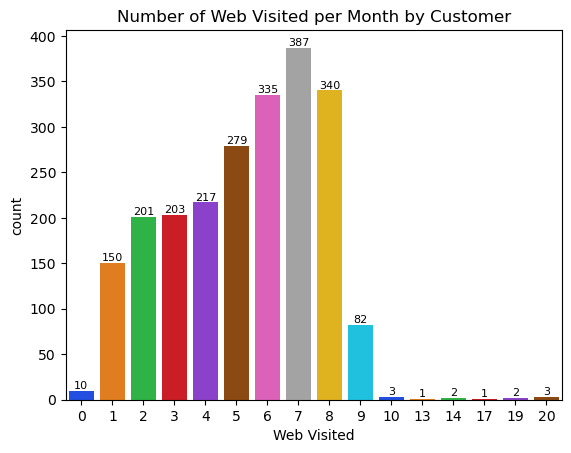

In [34]:
# DISPLAY NumWebVisitsMonth Histogram

axes = sns.countplot(data= numeric_data, x= 'NumWebVisitsMonth', palette='bright')

for ax in axes.patches:
    axes.text(x= ax.get_x() + ax.get_width() / 2, y= ax.get_height(), s= int(ax.get_height()), ha='center', va='bottom', fontsize=8)
plt.title('Number of Web Visited per Month by Customer')
plt.xlabel('Web Visited')
plt.show()

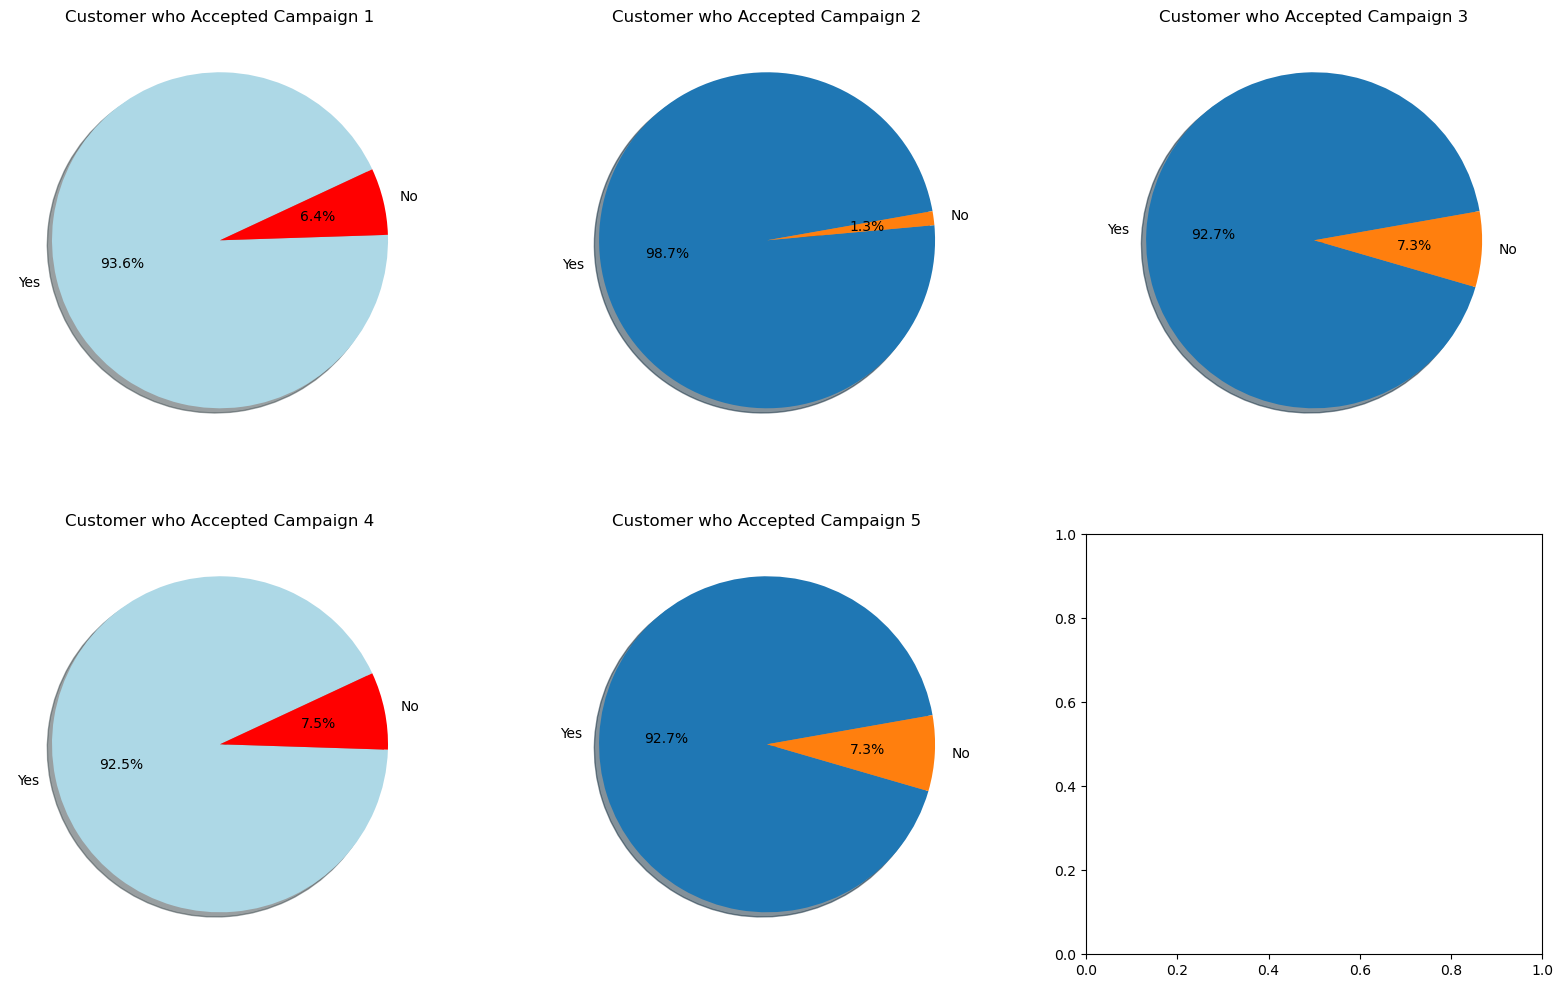

In [35]:
# DISPLAY 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2'

fig, axes = plt.subplots(nrows= 2, ncols=3, figsize=(20,12))

axes[0,0].pie(data['AcceptedCmp1'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%',startangle=25, shadow=True, colors=['lightblue','red'])
axes[0,0].set_title('Customer who Accepted Campaign 1')

axes[0,1].pie(data['AcceptedCmp2'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%', startangle=10, shadow=True)
axes[0,1].set_title('Customer who Accepted Campaign 2')

axes[0,2].pie(data['AcceptedCmp3'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%', startangle=10, shadow=True)
axes[0,2].set_title('Customer who Accepted Campaign 3')

axes[1,0].pie(data['AcceptedCmp4'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%',startangle=25, shadow=True, colors=['lightblue','red'])
axes[1,0].set_title('Customer who Accepted Campaign 4')

axes[1,1].pie(data['AcceptedCmp5'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%', startangle=10, shadow=True)
axes[1,1].set_title('Customer who Accepted Campaign 5')

axes[1,2] = None

Text(0.5, 1.0, 'Customer that Response to the Campaign')

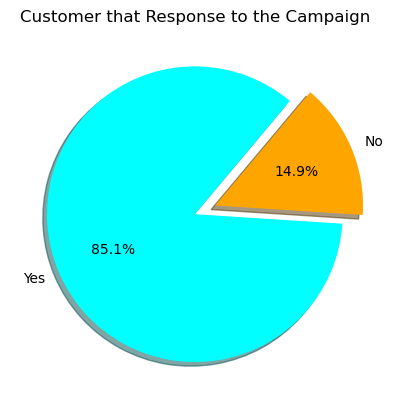

In [36]:
# DISPLAY RESPONSE CUSTOMER

plt.pie(data.Response.value_counts(), autopct='%1.1f%%', shadow=True, explode=[0,0.15], startangle= 50, colors=['cyan','orange'], labels=['Yes','No'])
plt.title('Customer that Response to the Campaign')

C:\Users\UAE\AppData\Local\Temp\ipykernel_21572\93985922.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




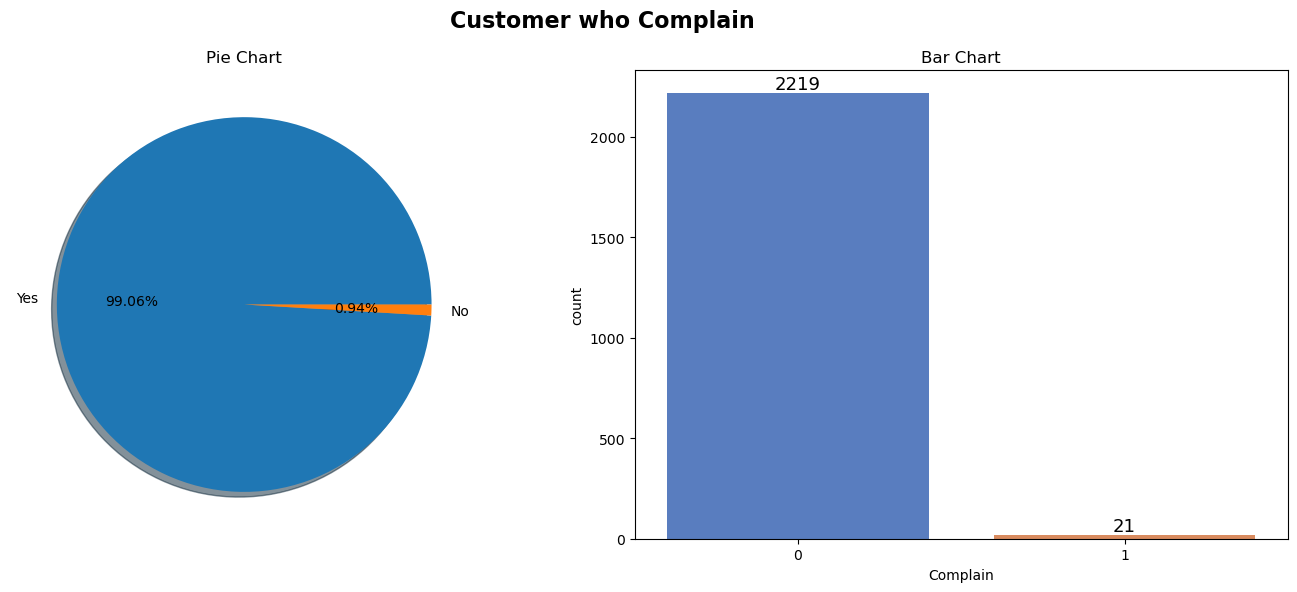

In [37]:
# CUSTOMER WHO COMPLAIN

plt.figure(figsize=(14,6))

# SHOW PIE CHART
plt.subplot(1,2,1)
plt.pie(x = data['Complain'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%', shadow=True)
plt.title('Pie Chart')

# SHOW BAR CHART
plt.subplot(1,2,2)
axes = sns.countplot(data= data, x='Complain', palette='muted')
plt.title('Bar Chart')

for ax in axes.patches:
    axes.text(x= ax.get_x() + ax.get_width() / 2, y= ax.get_height(), s= int(ax.get_height()), ha='center', va='bottom', fontsize=13)

plt.suptitle('Customer who Complain',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [38]:
# CONVERT EDUCATION AND MARITAL STATUS USING LABEL ENCODER

encoder = LabelEncoder()
data_clean['Education'] = encoder.fit_transform(data_clean['Education'])
data_clean['Marital_Status'] = encoder.fit_transform(data_clean['Marital_Status'])

data_clean.head(4)

C:\Users\UAE\AppData\Local\Temp\ipykernel_21572\3392822965.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\UAE\AppData\Local\Temp\ipykernel_21572\3392822965.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0


In [39]:
# ADD NEW 'AGE' FEATURE and 'Total items Purchases' Feature

# DECLARE CURRENT YEAR
current_year = datetime.now().year

data_clean['Age'] = current_year - data_clean['Year_Birth']
data_clean['Total_Items_Purchases'] = data_clean['MntWines'] + data_clean['MntFruits'] + data_clean['MntMeatProducts'] + data_clean['MntFishProducts'] + data_clean['MntSweetProducts'] + data_clean['MntGoldProds']

data_clean.head(4)

C:\Users\UAE\AppData\Local\Temp\ipykernel_21572\35066346.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\UAE\AppData\Local\Temp\ipykernel_21572\35066346.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Items_Purchases
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,1617
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,27
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,776
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,53


In [40]:
#CHOOSE COLUMNS TO CLUSTER
cols_to_cluster = ['Income','Age','Education','Marital_Status','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Total_Items_Purchases','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

data_cluster = data_clean[cols_to_cluster]

data_cluster

,Income,Age,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Items_Purchases,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,58138.0,68,2,4,0,0,58,635,88,546,172,88,88,1617,3,8,10,4
1,46344.0,71,2,4,1,1,38,11,1,6,2,1,6,27,2,1,1,2
2,71613.0,60,2,5,0,0,26,426,49,127,111,21,42,776,1,8,2,10
3,26646.0,41,2,5,1,0,26,11,4,20,10,3,5,53,2,2,0,4
4,58293.0,44,4,3,1,0,94,173,43,118,46,27,15,422,5,5,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,58,2,3,0,1,46,709,43,182,42,118,247,1341,2,9,3,4
2236,64014.0,79,4,5,2,1,56,406,0,30,0,0,8,444,7,8,2,5
2237,56981.0,44,2,2,0,0,91,908,48,217,32,12,24,1241,1,2,3,13
2238,69245.0,69,3,5,0,1,8,428,30,214,80,30,61,843,2,6,5,10


In [41]:
# CHOOSE FEATURE TO NORMALIZE
cols_to_normalize = ['Income']

# FIT MODEL
robust = RobustScaler()
data_cluster[cols_to_normalize] = robust.fit_transform(data_cluster[cols_to_normalize])

data_cluster.head(5)

C:\Users\UAE\AppData\Local\Temp\ipykernel_21572\2226363533.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Income,Age,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Items_Purchases,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,0.206595,68,2,4,0,0,58,635,88,546,172,88,88,1617,3,8,10,4
1,-0.149787,71,2,4,1,1,38,11,1,6,2,1,6,27,2,1,1,2
2,0.613771,60,2,5,0,0,26,426,49,127,111,21,42,776,1,8,2,10
3,-0.745005,41,2,5,1,0,26,11,4,20,10,3,5,53,2,2,0,4
4,0.211279,44,4,3,1,0,94,173,43,118,46,27,15,422,5,5,3,6


In [42]:
data_cluster['Income'].describe()

count    2208.000000
mean        0.010051
std         0.625900
min        -1.497896
25%        -0.486648
50%         0.000000
75%         0.513352
max         1.886550
Name: Income, dtype: float64

<Axes: >

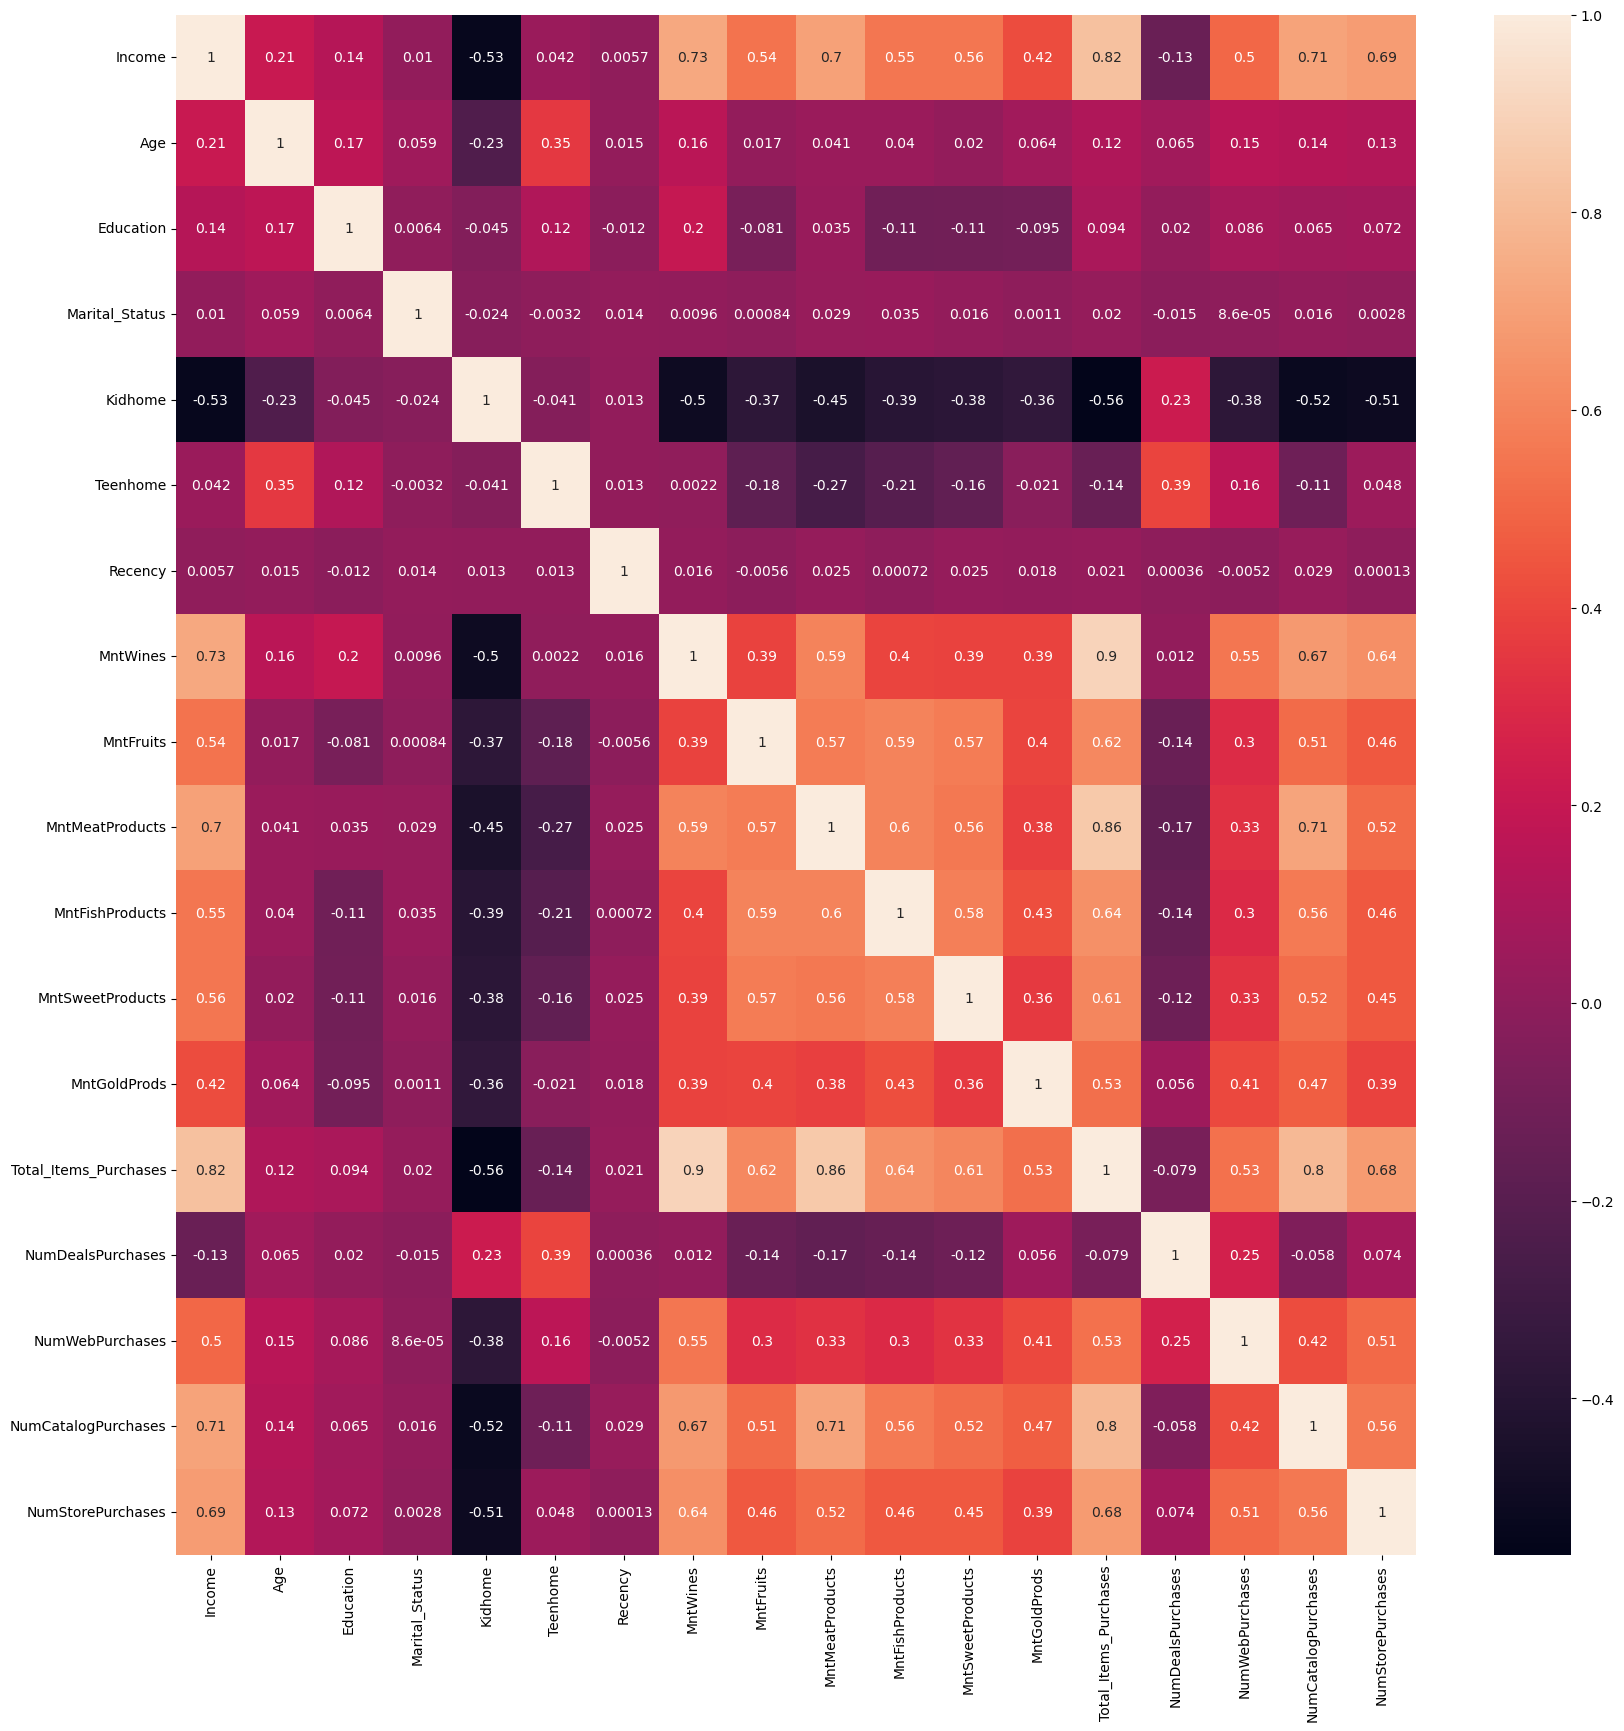

In [43]:
# CORRELATION

data_corr = data_cluster.corr('pearson')

plt.figure(figsize=(20,20))
sns.heatmap(data= data_corr, annot=True)

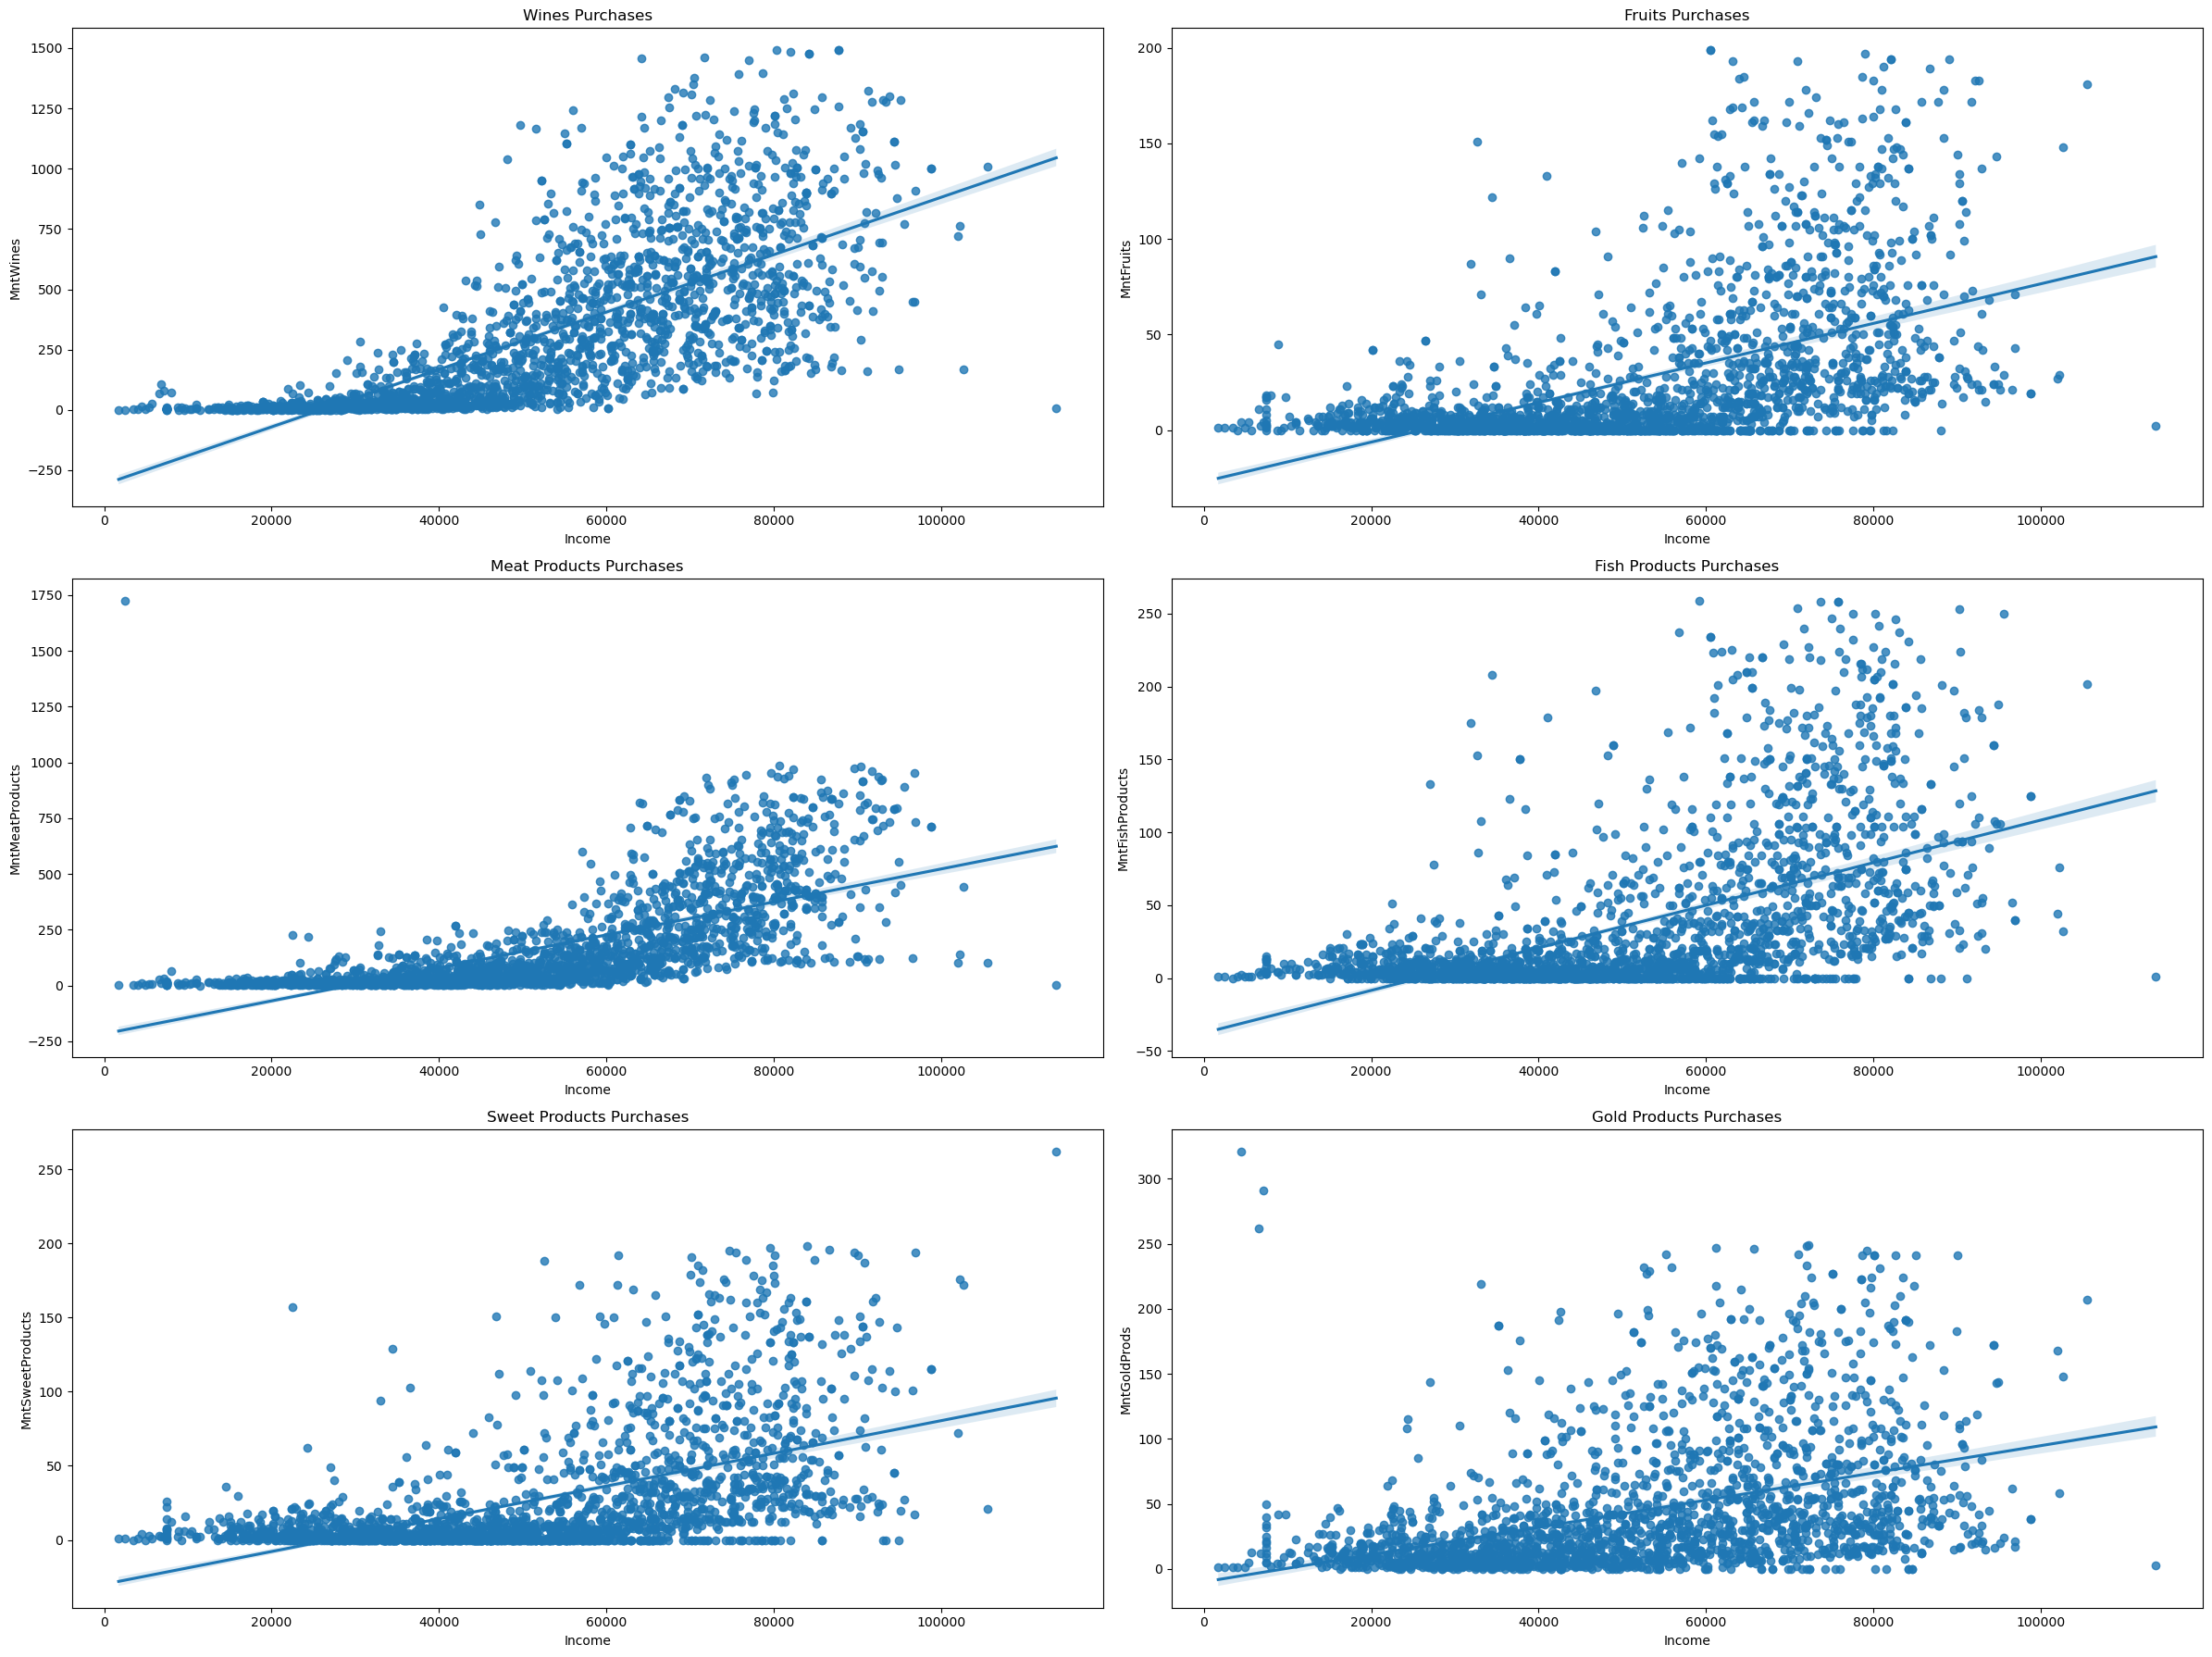

In [44]:
fig, axes = plt.subplots(nrows=3, ncols= 2,figsize=(24,18))

# Membuat lmplot
sns.regplot(data=data_clean, x='Income', y='MntWines', ax=axes[0,0])
axes[0,0].set_title('Wines Purchases')

sns.regplot(data=data_clean, x='Income', y='MntFruits', ax=axes[0,1])
axes[0,1].set_title('Fruits Purchases')

sns.regplot(data=data_clean, x='Income', y='MntMeatProducts', ax=axes[1,0])
axes[1,0].set_title('Meat Products Purchases')

sns.regplot(data=data_clean, x='Income', y='MntFishProducts', ax=axes[1,1])
axes[1,1].set_title('Fish Products Purchases')

sns.regplot(data=data_clean, x='Income', y='MntSweetProducts', ax=axes[2,0])
axes[2,0].set_title('Sweet Products Purchases')

sns.regplot(data=data_clean, x='Income', y='MntGoldProds', ax=axes[2,1])
axes[2,1].set_title('Gold Products Purchases')
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



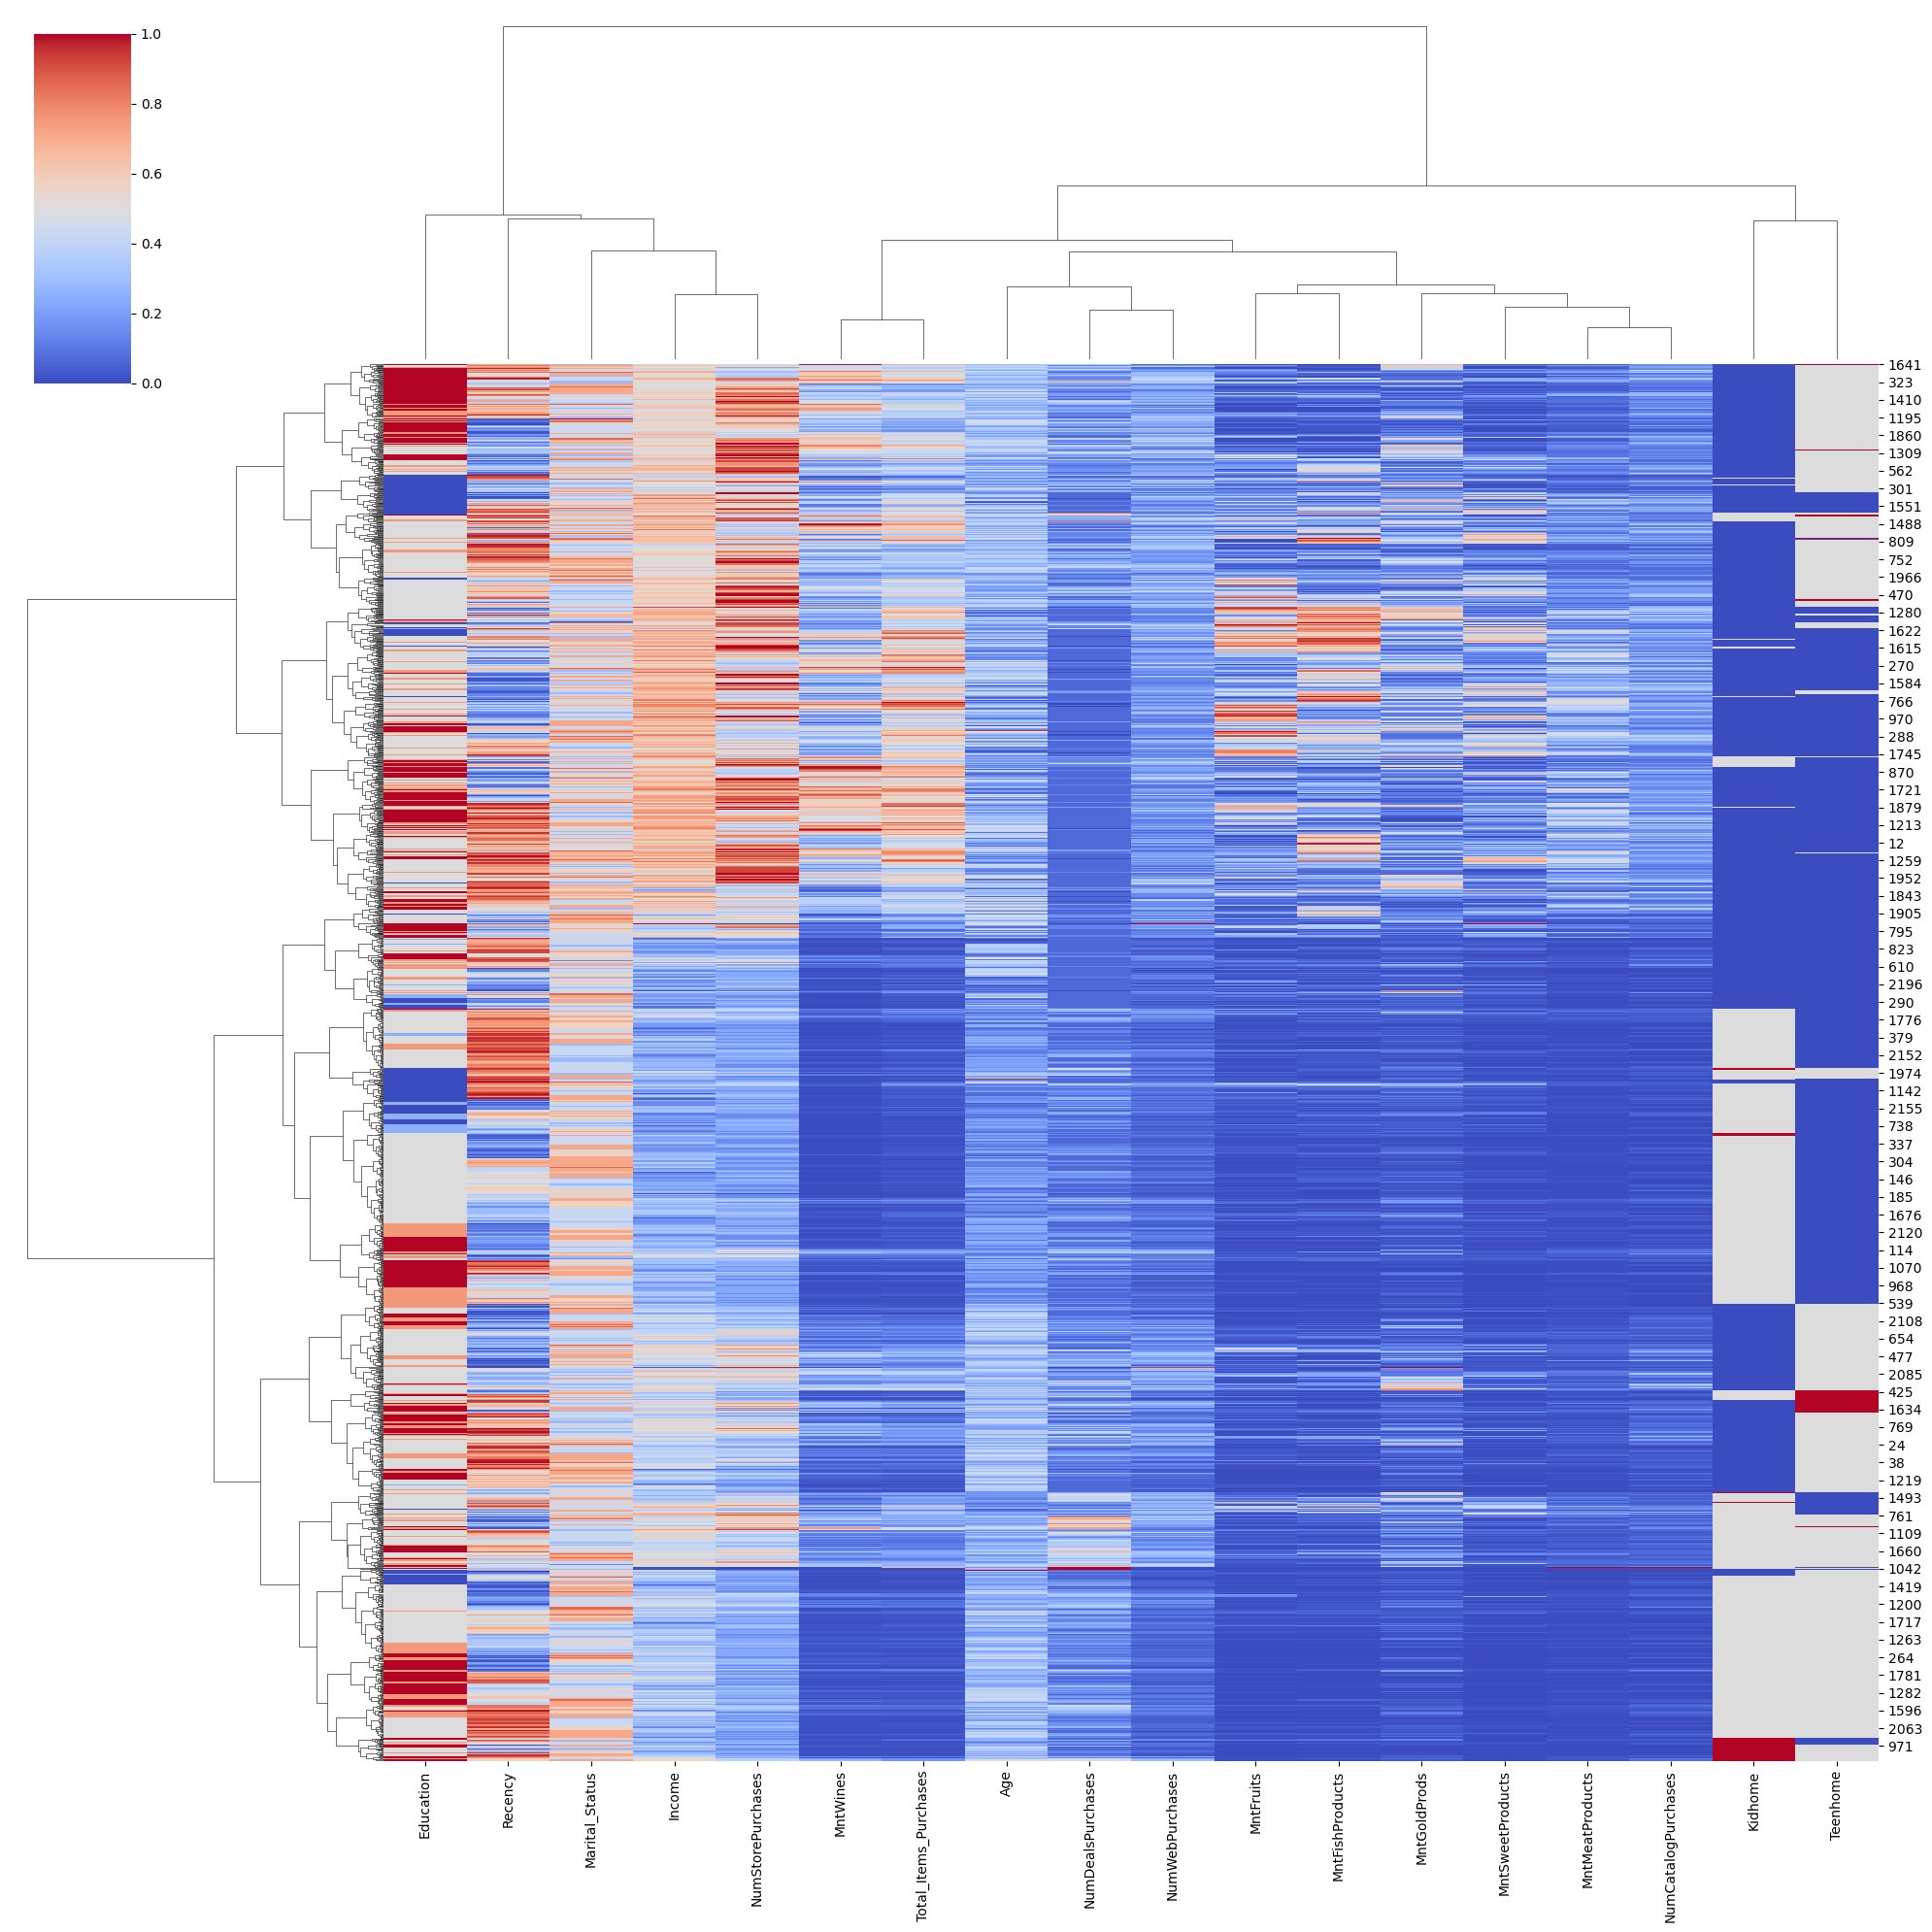

In [45]:
sns.clustermap(data=data_cluster, cmap='coolwarm', figsize=(20,20), standard_scale=1, metric='euclidean', method='ward')

In [46]:
# REDUCE DIMENSION

pca = PCA(n_components= None)

data_reduced = pca.fit_transform(data_cluster)

print(f'Number of Components : {pca.n_components_}\n')
print(f'Ratio every Component / PC : \n{pca.explained_variance_ratio_}\n')
print(f'PCA Components : \n{pca.components_}\n')
print(f'Eigen Value of Components : \n{pca.explained_variance_}\n')
print(f'Feature of Components : \n{pca.feature_names_in_}')

Number of Components : 18

Ratio every Component / PC : 
[9.25686791e-01 5.71431801e-02 9.15704367e-03 3.07316232e-03
 1.77640757e-03 1.57262590e-03 1.29412369e-03 2.61194016e-04
 1.24356307e-05 7.89126321e-06 5.14195038e-06 4.94489781e-06
 2.15973172e-06 2.05391774e-06 4.10655338e-07 2.81115974e-07
 1.52408020e-07 2.69468828e-18]

PCA Components : 
[[ 7.30191278e-04  2.08499415e-03  1.80488392e-04  2.98365795e-05
  -4.23531233e-04 -9.63807896e-05  8.62561153e-04  4.42320182e-01
   3.31484941e-02  2.60219178e-01  4.76881930e-02  3.39262762e-02
   3.74952790e-02  8.54797602e-01 -1.86204204e-04  2.09427769e-03
   3.14633978e-03  3.13936089e-03]
 [-1.93635862e-04  8.37491278e-03  1.34931554e-03 -1.43602237e-04
   2.43669428e-05  9.72813583e-04 -1.82953959e-03  7.39481652e-01
  -7.37322277e-02 -6.30638009e-01 -1.11454548e-01 -7.17531243e-02
  -2.93802593e-02 -1.77476517e-01  2.20759547e-03  2.80878221e-03
  -2.06819696e-03  1.02613145e-03]
 [-5.41311729e-04 -4.70379081e-04  3.74390963e-03 

In [47]:
highest_variance_PC = pca.components_[:3]

PC_df = pd.DataFrame(highest_variance_PC.T, index=data_cluster.columns, columns=['PC1','PC2','PC3']) 
PC_df = PC_df.sort_values(by=['PC1','PC2','PC3'], ascending=False)
PC_df

,PC1,PC2,PC3
Total_Items_Purchases,0.854798,-0.177477,-0.301969
MntWines,0.442320,0.739482,0.333076
MntMeatProducts,0.260219,-0.630638,0.613811
MntFishProducts,0.047688,-0.111455,-0.377551
MntGoldProds,0.037495,-0.029380,-0.420493
MntSweetProducts,0.033926,-0.071753,-0.225943
MntFruits,0.033148,-0.073732,-0.224870
NumCatalogPurchases,0.003146,-0.002068,-0.003002
NumStorePurchases,0.003139,0.001026,-0.006094
NumWebPurchases,0.002094,0.002809,-0.006515


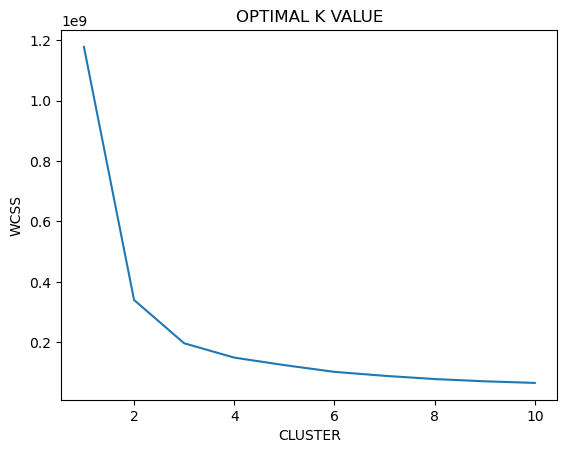

In [48]:
# FIND K-OPTIMAL WITH ELBOW METHOD

k_range = range(1,11)
inertia = []

for k in k_range:
    kmean = KMeans(n_clusters=k , init='k-means++', random_state=12, n_init=10)
    kmean.fit(data_reduced)  # FIT THE MODEL
    inertia.append(kmean.inertia_)  # GET THE COST FUNCTION

plt.plot(k_range, inertia)
plt.title('OPTIMAL K VALUE')
plt.xlabel('CLUSTER')
plt.ylabel('WCSS')
plt.show()

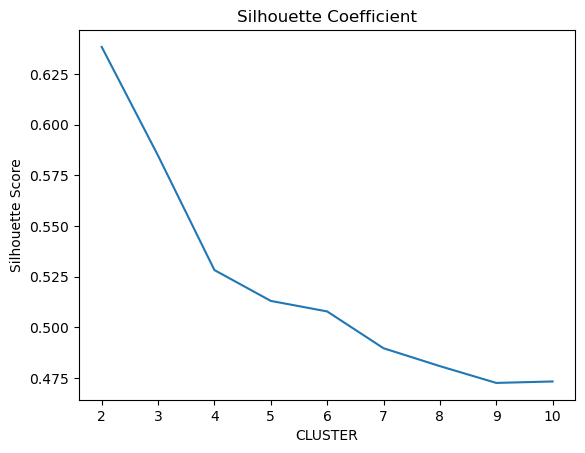

In [49]:
# CHECK HOW GOOD THE CLUSTER USING SILHOUETTE COEFFICIENT

k_range = range(2,11)
sil_scores = []

for k in k_range:
    kmean = KMeans(n_clusters=k, random_state=12, init='k-means++', n_init=10)
    kmean.fit(data_reduced)
    label = kmean.labels_
    sil_score = silhouette_score(X= data_reduced, labels=label, metric='euclidean')
    sil_scores.append(sil_score)

plt.plot(k_range, sil_scores)
plt.title('Silhouette Coefficient')
plt.xlabel('CLUSTER')
plt.ylabel('Silhouette Score')
plt.show()

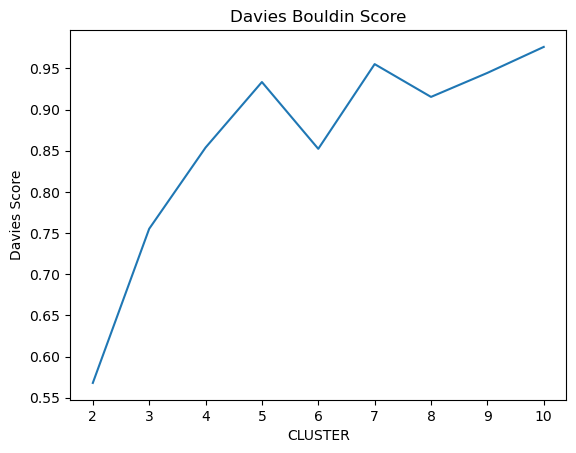

In [50]:
# DAVIES BOULDIN SCORE

k_range = range(2,11)
davies_score = []

for k in k_range:
    kmean = KMeans(n_clusters=k, init='k-means++', random_state=12, n_init=10)
    kmean.fit(X= data_reduced)
    davies = davies_bouldin_score(X= data_reduced, labels=kmean.labels_)
    davies_score.append(davies)

plt.plot(k_range, davies_score)
plt.title('Davies Bouldin Score')
plt.xlabel('CLUSTER')
plt.ylabel('Davies Score')
plt.show()

In [51]:
# K-MEANS

fixed_kmean = KMeans(n_clusters=3, init='k-means++', random_state=12, n_init=1)
fixed_kmean.fit(data_reduced)

KMeans(n_clusters=3, n_init=1, random_state=12)

In [52]:
# EVALUATION

wcss = fixed_kmean.inertia_
sil_coef = silhouette_score(X= data_reduced, labels=fixed_kmean.labels_)
davies_bouldin = davies_bouldin_score(X= data_reduced, labels= fixed_kmean.labels_)

print(f'WCSS Score : {wcss}')
print(f'Silhouette Coefficient Score : {sil_coef}')
print(f'Davies Bouldin Score : {davies_bouldin}')

WCSS Score : 196295135.05833998
Silhouette Coefficient Score : 0.5846878808392033
Davies Bouldin Score : 0.7552233823031687


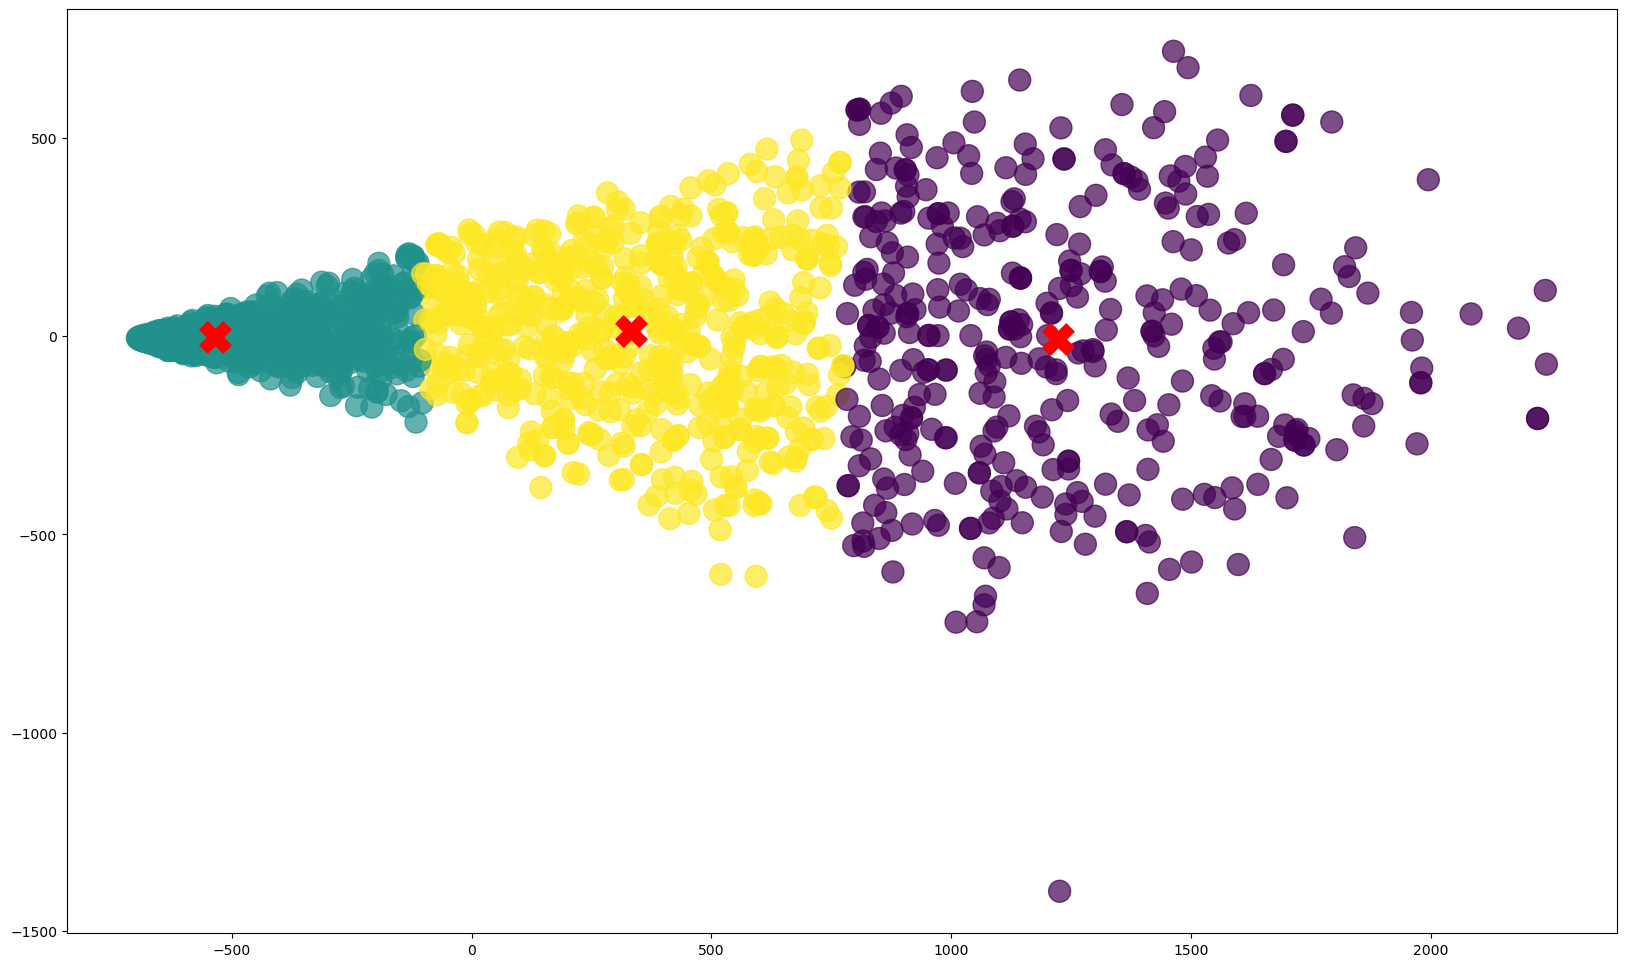

In [53]:
# VISUALIZE K-MEANS USING 2D SCATTER PLOT

centroids = fixed_kmean.cluster_centers_

# SCATTER PLOT
plt.figure(figsize=(20,12))
plt.scatter(x= data_reduced[:,0], y= data_reduced[:,1], c= fixed_kmean.labels_, cmap='viridis', s=250, alpha=0.7)
plt.scatter(x= centroids[:,0], y=centroids[:,1], c='red', marker='X', label='Centroid', s=500)

c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning:

invalid value encountered in sqrt



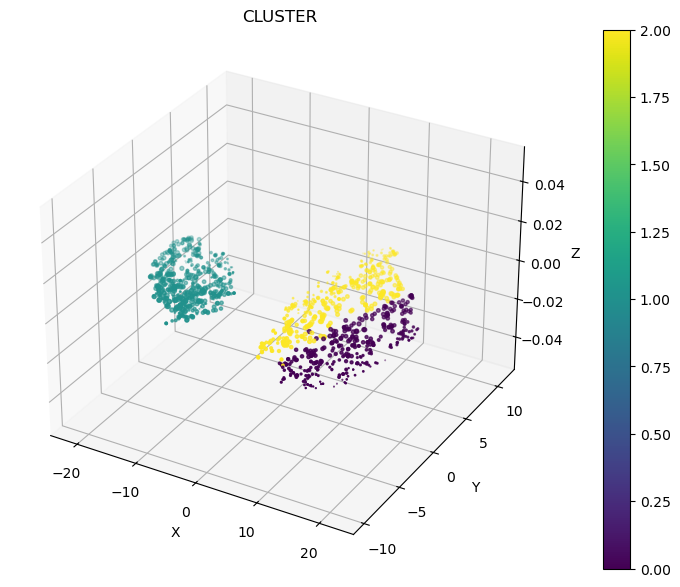

In [54]:
# VISUALIZE 3D SCATTER PLOT USING TSNE

tsne = TSNE(n_components=3)
tsne_data = tsne.fit_transform(data_reduced)

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1,1,1,projection='3d')

scatter = plt.scatter(x = tsne_data[:,0], y= tsne_data[:,1], s= tsne_data[:,2], c=fixed_kmean.labels_)

ax.set_title('CLUSTER')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

fig.colorbar(scatter)

plt.show()